In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]
train_path = 'Desktop/train'
valid_path = 'Desktop/validation'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:

folders = glob('Desktop/train/*')

In [7]:
folders

['Desktop/train\\Healthy',
 'Desktop/train\\Mild Bacterial blight',
 'Desktop/train\\Mild Blast',
 'Desktop/train\\Mild Brownspot',
 'Desktop/train\\Mild Tungro',
 'Desktop/train\\Severe Bacterial blight',
 'Desktop/train\\Severe Blast',
 'Desktop/train\\Severe Brownspot',
 'Desktop/train\\Severe Tungro']

In [8]:

x = Flatten()(vgg.output)

In [11]:
prev_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
prev_model = load_model('Desktop/model_vgg16.h5') # loading the previously saved model.
new_model = Sequential()
new_model.add(prev_model)
new_model.add(Dense(128,activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(256,activation='relu'))
new_model.add(Dropout(0.6))
new_model.add(Dense(64,activation='relu'))
new_model.add(Dense(9,activation='softmax'))
new_model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
prediction

<KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'dense_6')>

In [30]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 9)                 14940489  
                                                                 
 dense_7 (Dense)             (None, 128)               1280      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 dense_10 (Dense)            (None, 9)                

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory('Desktop/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2826 images belonging to 9 classes.


In [33]:
test_set = test_datagen.flow_from_directory('Desktop/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 180 images belonging to 9 classes.


In [34]:
test_set.filenames

['Healthy\\IMG_20190419_172952.jpg',
 'Healthy\\IMG_20190419_173344.jpg',
 'Healthy\\IMG_20190419_173904.jpg',
 'Healthy\\IMG_20190419_174133.jpg',
 'Healthy\\IMG_20190419_174218.jpg',
 'Healthy\\IMG_20190419_174308.jpg',
 'Healthy\\IMG_20190420_193425.jpg',
 'Healthy\\IMG_20190420_194105.jpg',
 'Healthy\\IMG_20190420_194338.jpg',
 'Healthy\\IMG_20190420_200326.jpg',
 'Healthy\\IMG_20190420_200436.jpg',
 'Healthy\\IMG_20190420_200508.jpg',
 'Healthy\\IMG_20190421_195322.jpg',
 'Healthy\\IMG_20190424_125921.jpg',
 'Healthy\\IMG_20190424_130047.jpg',
 'Healthy\\IMG_20190424_130138.jpg',
 'Healthy\\IMG_20190424_130226.jpg',
 'Healthy\\IMG_20190424_130350.jpg',
 'Healthy\\IMG_20190424_130430.jpg',
 'Healthy\\IMG_20190424_130546.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_167.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_183.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_187.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_191.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_192.jpg',


In [35]:
r = new_model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HOME\AppData\Local\Temp\ipykernel_17504\375296764.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = new_model.fit_generator(


Epoch 1/50
89/89 [==============================] - 295s 3s/step - loss: 1.2305 - accuracy: 0.6936 - val_loss: 0.1054 - val_accuracy: 0.9778
Epoch 2/50
89/89 [==============================] - 287s 3s/step - loss: 0.3877 - accuracy: 0.9105 - val_loss: 0.0815 - val_accuracy: 0.9944
Epoch 3/50
89/89 [==============================] - 286s 3s/step - loss: 0.2412 - accuracy: 0.9476 - val_loss: 0.1814 - val_accuracy: 0.9556
Epoch 4/50
89/89 [==============================] - 301s 3s/step - loss: 0.2792 - accuracy: 0.9282 - val_loss: 0.3046 - val_accuracy: 0.9333
Epoch 5/50
89/89 [==============================] - 280s 3s/step - loss: 0.2400 - accuracy: 0.9441 - val_loss: 0.1231 - val_accuracy: 0.9722
Epoch 6/50
89/89 [==============================] - 285s 3s/step - loss: 0.3020 - accuracy: 0.9370 - val_loss: 0.1193 - val_accuracy: 0.9778
Epoch 7/50
89/89 [==============================] - 320s 4s/step - loss: 0.3284 - accuracy: 0.9243 - val_loss: 0.2833 - val_accuracy: 0.9167
Epoch 8/50
89

In [36]:
import matplotlib.pyplot as plt

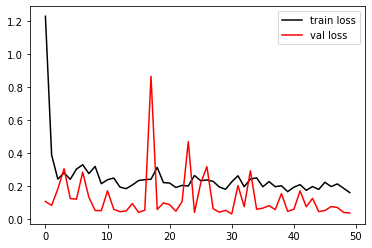

<Figure size 432x288 with 0 Axes>

In [127]:
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="red")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




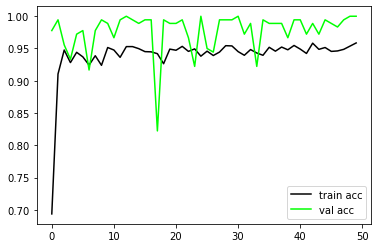

<Figure size 432x288 with 0 Axes>

In [130]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="lime")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [70]:

from tensorflow.keras.models import load_model

new_model.save('model_custommodel.h5')

In [71]:
model=load_model('model_custommodel.h5')

In [72]:
y_pred = model.predict(test_set)
y_pred

6/6 [==============================] - 18s 3s/step


array([[1.0000000e+00, 1.9226204e-10, 2.2105928e-11, ..., 4.9113582e-12,
        1.0753250e-10, 2.8535236e-09],
       [1.0000000e+00, 1.9226132e-10, 2.2105802e-11, ..., 4.9113396e-12,
        1.0753209e-10, 2.8535128e-09],
       [1.0000000e+00, 1.9226132e-10, 2.2105802e-11, ..., 4.9113396e-12,
        1.0753209e-10, 2.8535128e-09],
       ...,
       [2.8299004e-07, 3.2495336e-06, 8.6752408e-07, ..., 6.1412101e-07,
        1.6761777e-07, 9.9685401e-01],
       [2.8299058e-07, 3.2495366e-06, 8.6752573e-07, ..., 6.1412277e-07,
        1.6761810e-07, 9.9685401e-01],
       [2.8305149e-07, 3.2501334e-06, 8.6770581e-07, ..., 6.1425669e-07,
        1.6765991e-07, 9.9685365e-01]], dtype=float32)

In [73]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8], dtype=int64)

In [74]:
import os
path ='Desktop/validation'
Diseases_types=os.listdir(path)

In [75]:
diseases = []
for i in Diseases_types:
  all_images = os.listdir(path + '/' +i)

  for j in all_images :
    diseases.append((i))
    print (diseases)

['Healthy']
['Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy

In [76]:
diseases

['Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',


In [77]:
from sklearn.preprocessing import LabelEncoder
diseases = np.array(diseases)
diseases.reshape(180,-1)
y_labelencoder = LabelEncoder()



In [78]:
diseases

array(['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild Blast', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild Blast', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild B

In [79]:
y_test = y_labelencoder.fit_transform (diseases)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8], dtype=int64)

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [82]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [83]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='micro')

1.0

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [85]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

1.0

In [86]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average='micro')

1.0

In [92]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int64)

In [88]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Healthy','Mild Bacterial blight','Mild Blast','Mild Brownspot','Mild Tungro','Severe Bacterial blight','Severe Blast','Severe Brownspot','Severe Tungro'], 
                     columns = ['Healthy','Mild Bacterial blight','Mild Blast','Mild Brownspot','Mild Tungro','Severe Bacterial blight','Severe Blast','Severe Brownspot','Severe Tungro'])

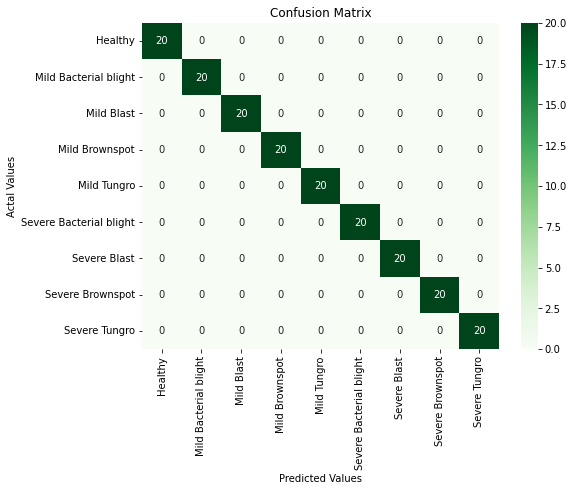

In [89]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [90]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [116]:
img=image.load_img('Desktop/test_img.jpg',target_size=(224,224))

In [117]:
x=image.img_to_array(img)
x

array([[[ 75.,  87.,  49.],
        [ 61.,  73.,  35.],
        [ 54.,  66.,  26.],
        ...,
        [ 53.,  71.,  29.],
        [ 52.,  70.,  28.],
        [ 48.,  66.,  26.]],

       [[ 81.,  96.,  55.],
        [ 67.,  82.,  39.],
        [ 59.,  74.,  31.],
        ...,
        [ 52.,  70.,  28.],
        [ 51.,  69.,  27.],
        [ 48.,  66.,  26.]],

       [[ 85., 102.,  58.],
        [ 71.,  88.,  44.],
        [ 63.,  80.,  35.],
        ...,
        [ 49.,  70.,  27.],
        [ 49.,  70.,  27.],
        [ 47.,  68.,  27.]],

       ...,

       [[136., 102.,  92.],
        [136., 102.,  92.],
        [136., 102.,  92.],
        ...,
        [168., 114., 112.],
        [168., 114., 112.],
        [168., 114., 112.]],

       [[147., 107.,  97.],
        [147., 107.,  97.],
        [147., 107.,  97.],
        ...,
        [181., 119., 122.],
        [181., 119., 122.],
        [181., 119., 122.]],

       [[167., 118., 111.],
        [167., 118., 111.],
        [167., 1

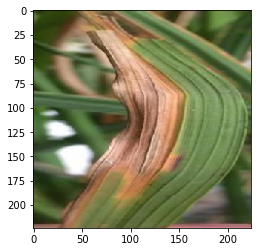

In [118]:
from matplotlib.pyplot import imshow
imshow(img)

In [119]:
x=x/255

In [120]:
x


array([[[0.29411766, 0.34117648, 0.19215687],
        [0.23921569, 0.28627452, 0.13725491],
        [0.21176471, 0.25882354, 0.10196079],
        ...,
        [0.20784314, 0.2784314 , 0.11372549],
        [0.20392157, 0.27450982, 0.10980392],
        [0.1882353 , 0.25882354, 0.10196079]],

       [[0.31764707, 0.3764706 , 0.21568628],
        [0.2627451 , 0.32156864, 0.15294118],
        [0.23137255, 0.2901961 , 0.12156863],
        ...,
        [0.20392157, 0.27450982, 0.10980392],
        [0.2       , 0.27058825, 0.10588235],
        [0.1882353 , 0.25882354, 0.10196079]],

       [[0.33333334, 0.4       , 0.22745098],
        [0.2784314 , 0.34509805, 0.17254902],
        [0.24705882, 0.3137255 , 0.13725491],
        ...,
        [0.19215687, 0.27450982, 0.10588235],
        [0.19215687, 0.27450982, 0.10588235],
        [0.18431373, 0.26666668, 0.10588235]],

       ...,

       [[0.53333336, 0.4       , 0.36078432],
        [0.53333336, 0.4       , 0.36078432],
        [0.53333336, 0

In [121]:
import cv2
x = cv2.resize(x,(224,224)) 
x = x.reshape(1,224,224,3) 

In [122]:
x.shape

(1, 224, 224, 3)

In [123]:
model.predict(x)

1/1 [==============================] - 0s 91ms/step


array([[7.21337727e-08, 1.83752943e-02, 1.46254752e-04, 2.96867747e-05,
        3.11308540e-05, 9.80941236e-01, 2.13716034e-04, 1.01876525e-04,
        1.60819938e-04]], dtype=float32)

In [124]:
a=model.predict(x)

1/1 [==============================] - 0s 95ms/step


In [125]:
a.argmax()

5

In [126]:
folders

['Desktop/train\\Healthy',
 'Desktop/train\\Mild Bacterial blight',
 'Desktop/train\\Mild Blast',
 'Desktop/train\\Mild Brownspot',
 'Desktop/train\\Mild Tungro',
 'Desktop/train\\Severe Bacterial blight',
 'Desktop/train\\Severe Blast',
 'Desktop/train\\Severe Brownspot',
 'Desktop/train\\Severe Tungro']